In [4]:
import os
os.chdir('/Users/dlf/Research/SchemRep/MDSplots')
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
# %%
tblStim=pd.read_csv(r"/Users/dlf/Research/SchemRep/stim/PTBtasks/fullStimList.csv")
tblStim.head()
# %%
filelist=tblStim['ObjectFile'].to_list()
imagePath=r"/Users/dlf/Research/SchemRep/stim/PTBtasks/updatedObjectsResampled/"

In [2]:
tblStim

,pairID,subset,Object,ObjectFile,ObjectAltFile,SceneCongruent,SceneConFilename,SceneIncongruent,SceneIncFilename,SceneNeutral,SceneNeuFilename
0,1,1,briefcase,briefcase_exemplar1.jpg,briefcase_exemplar2.jpg,airport,Airport1.jpg,amusement park,amusementpark1.jpg,police station,policestation1.jpg
1,2,1,cactus,cactus1.jpg,cactus_online.jpg,arch,arch1.jpg,waterfall,waterfall1.jpg,flower shop,flowershop1.jpg
2,3,1,beer,beer1.jpg,beer2.jpg,bar,bar4.jpg,nursery,nursery1.jpg,roller rink,rollerrink1.jpg
3,4,1,swimsuit,swimsuit_exemplar1.jpg,swimsuit_exemplar2.jpg,beach,beach_2.jpg,classroom,classroom1.jpg,laundromat,laundryroom1.jpg
4,5,1,truck,truck1.jpg,truck_online.jpg,bridge,bridge1.jpg,McDonald's,mcdonalds.jpg,racetrack,racetrack1.jpg
...,...,...,...,...,...,...,...,...,...,...,...
109,34,3,dog toy,dogtoy1.jpg,dogtoy5.jpg,pet store,petstore1.jpg,ice stadium,icestadium1.jpg,restroom stall,restroom-stall1.jpg
110,35,3,chandelier,chandelier1.jpg,chandelier.jpg,hotel lobby,hotellobby1.jpg,attic,attic1.jpg,train station,trainstation1.jpg
111,36,3,seal,seal1.jpg,seal (2).jpg,aquarium,aquarium1.jpg,winery,winery1.jpg,seaport,seaport1.jpg
112,37,3,ice skate,iceskate1.jpg,iceskates8.jpg,ice stadium,icestadium1.jpg,hotel lobby,hotellobby1.jpg,country house,house1.jpg


In [5]:
tmp = sio.loadmat('modelRDMs/GLOVE.mat')
tmp['R']

array([[ 1.00000000e+00, -1.96893722e-02,  1.61557215e-03, ...,
         2.17821988e-02, -8.54243736e-02,  6.71100298e-02],
       [-1.96893722e-02,  1.00000000e+00,  1.49717304e-01, ...,
        -8.83841429e-06,  8.37735479e-02,  5.89607973e-02],
       [ 1.61557215e-03,  1.49717304e-01,  1.00000000e+00, ...,
         1.09009651e-01,  2.91537307e-01,  4.99956233e-02],
       ...,
       [ 2.17821988e-02, -8.83841429e-06,  1.09009651e-01, ...,
         1.00000000e+00,  1.91219557e-01,  4.19083288e-02],
       [-8.54243736e-02,  8.37735479e-02,  2.91537307e-01, ...,
         1.91219557e-01,  1.00000000e+00,  1.01923717e-01],
       [ 6.71100298e-02,  5.89607973e-02,  4.99956233e-02, ...,
         4.19083288e-02,  1.01923717e-01,  1.00000000e+00]])

In [6]:
import scipy.io as sio
import sklearn
from sklearn.manifold import TSNE, MDS

/Users/dlf/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/dlf/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


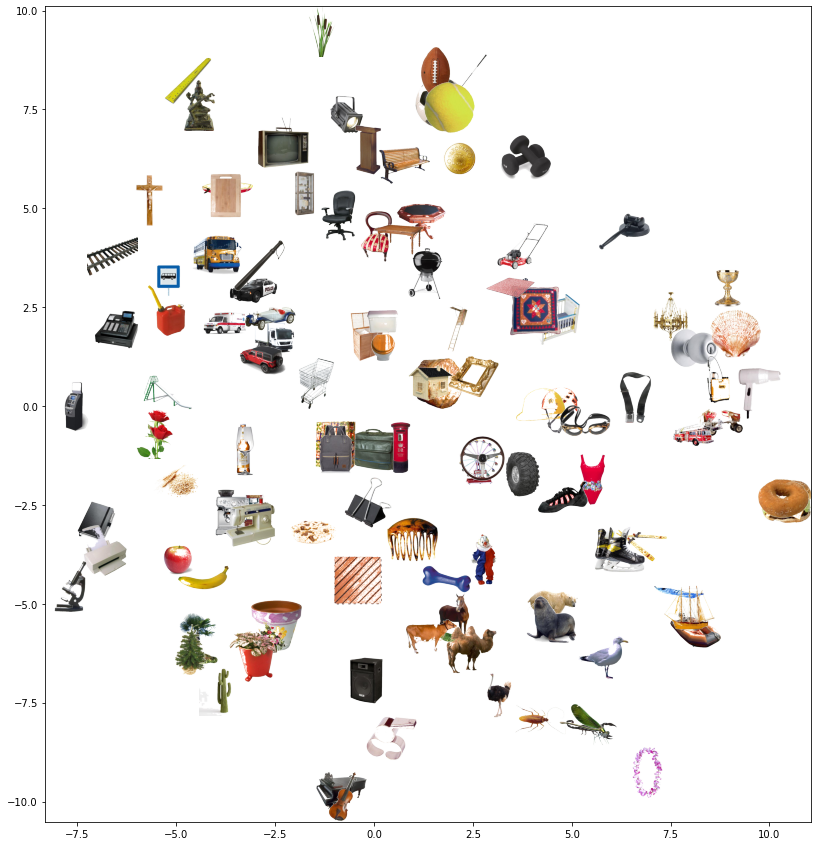

In [7]:
#R = sio.loadmat('modelRDMs/RSM_VGG16_PCA.mat')
#R = sio.loadmat('modelRDMs/RSM_HMAXc1_PCA_corr.mat')
R = sio.loadmat('modelRDMs/GLOVE.mat')
R = R['R']
# thresholding option below
R = R * (R > np.mean(R))

opt = 1

if opt==1:
    feat_embed = TSNE(n_components=2,
                  metric = 'precomputed', #requires a distance matrix as input
                  learning_rate = 'auto').fit_transform(1-R)
elif opt==2:
    feat_embed = MDS(n_components=2,
                  dissimilarity= 'precomputed' #requires a distance matrix as input
                  ).fit_transform(1-R)
elif opt==3:
    feat_embed, _ = sklearn.manifold.smacof(dissimilarities=1-R)

plt.figure(figsize=(15,15))
boxsize = 0.07 * (np.max(feat_embed[:,0])-np.min(feat_embed[:,0]))

plt.xlim(np.min(feat_embed[:,0])-0.5*boxsize, np.max(feat_embed[:,0])+0.5*boxsize)
plt.ylim(np.min(feat_embed[:,1])-0.5*boxsize, np.max(feat_embed[:,1])+0.5*boxsize)

for i in range(114):
    
    img = Image.open(imagePath + filelist[i])
    img = np.array(img)
    x,y,_ = img.shape
    threshold = 240
    alpha = (img[:,:,0]<threshold)*(img[:,:,1]<threshold)*(img[:,:,2]<threshold)*255
    alpha = np.reshape(alpha,(x,y,1))
    img = np.concatenate((img,alpha),axis=2)
    img = np.uint8(img)

    plt.imshow(img, 
               extent = [-0.5*boxsize+feat_embed[i,0],
                          0.5*boxsize+feat_embed[i,0],
                         -0.5*boxsize+feat_embed[i,1],
                          0.5*boxsize+feat_embed[i,1]]# left, right, bottom, top
              )

In [ ]:
plt.imshow(1-R)

/Users/dlf/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/dlf/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


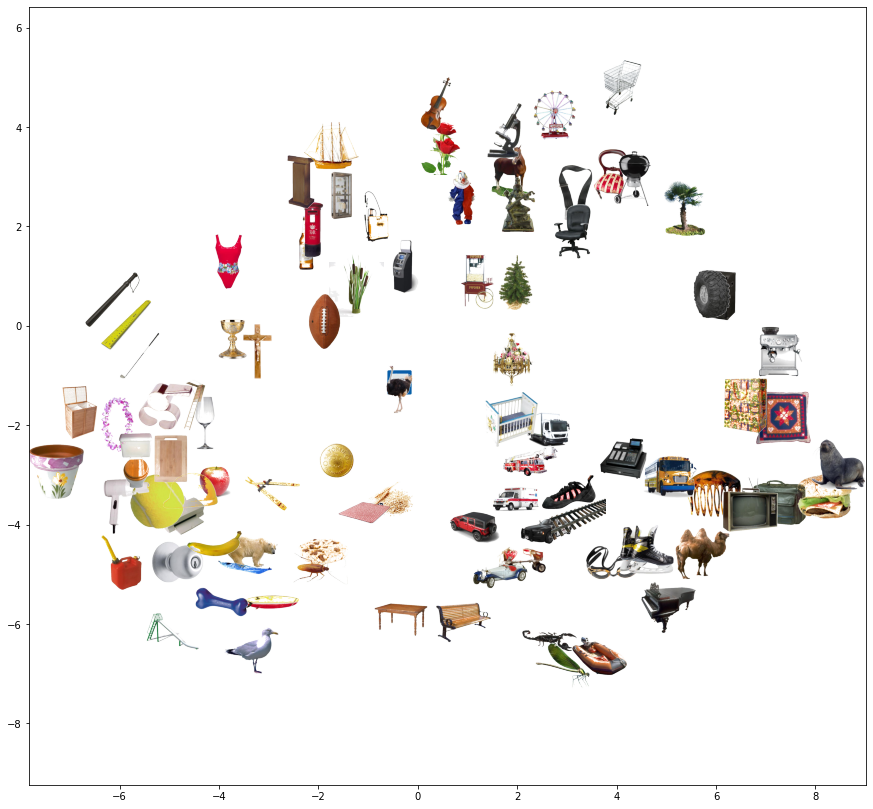

In [8]:
#R = sio.loadmat('modelRDMs/RSM_VGG16_PCA.mat')
R = sio.loadmat('modelRDMs/RSM_HMAXc1_PCA_corr.mat')
#R = sio.loadmat('modelRDMs/GLOVE.mat')
R = R['R']
# thresholding option below
R = R * (R > np.mean(R))

opt = 1

if opt==1:
    feat_embed = TSNE(n_components=2,
                  metric = 'precomputed', #requires a distance matrix as input
                  learning_rate = 'auto').fit_transform(1-R)
elif opt==2:
    feat_embed = MDS(n_components=2,
                  dissimilarity= 'precomputed' #requires a distance matrix as input
                  ).fit_transform(1-R)
elif opt==3:
    feat_embed, _ = sklearn.manifold.smacof(dissimilarities=1-R)

    
from scipy.spatial import distance_matrix
embed_dist = distance_matrix(x = feat_embed, y = feat_embed)
#feat_embed.shape

embed_sim = np.zeros((114,))
for i in range(114):
    embed_sim[i]=np.corrcoef(embed_dist[:,i].flatten(),(1-R)[:,i].flatten())[0,1]

plt.figure(figsize=(15,15))
boxsize = 0.07 * (np.max(feat_embed[:,0])-np.min(feat_embed[:,0]))

plt.xlim(np.min(feat_embed[:,0])-0.5*boxsize, np.max(feat_embed[:,0])+0.5*boxsize)
plt.ylim(np.min(feat_embed[:,1])-0.5*boxsize, np.max(feat_embed[:,1])+0.5*boxsize)

for i in range(114):
    
    img = Image.open(imagePath + filelist[i])
    img = np.array(img)
    x,y,_ = img.shape
    threshold = 240
    alpha = (img[:,:,0]<threshold)*(img[:,:,1]<threshold)*(img[:,:,2]<threshold)*255
    alpha = np.reshape(alpha,(x,y,1))
    img = np.concatenate((img,alpha),axis=2)
    img = np.uint8(img)
    if embed_sim[i] > np.mean(embed_sim) - np.std(embed_sim):
        plt.imshow(img, 
                   extent = [-0.5*boxsize+feat_embed[i,0],
                              0.5*boxsize+feat_embed[i,0],
                             -0.5*boxsize+feat_embed[i,1],
                              0.5*boxsize+feat_embed[i,1]]# left, right, bottom, top
                  )

/Users/dlf/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/dlf/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


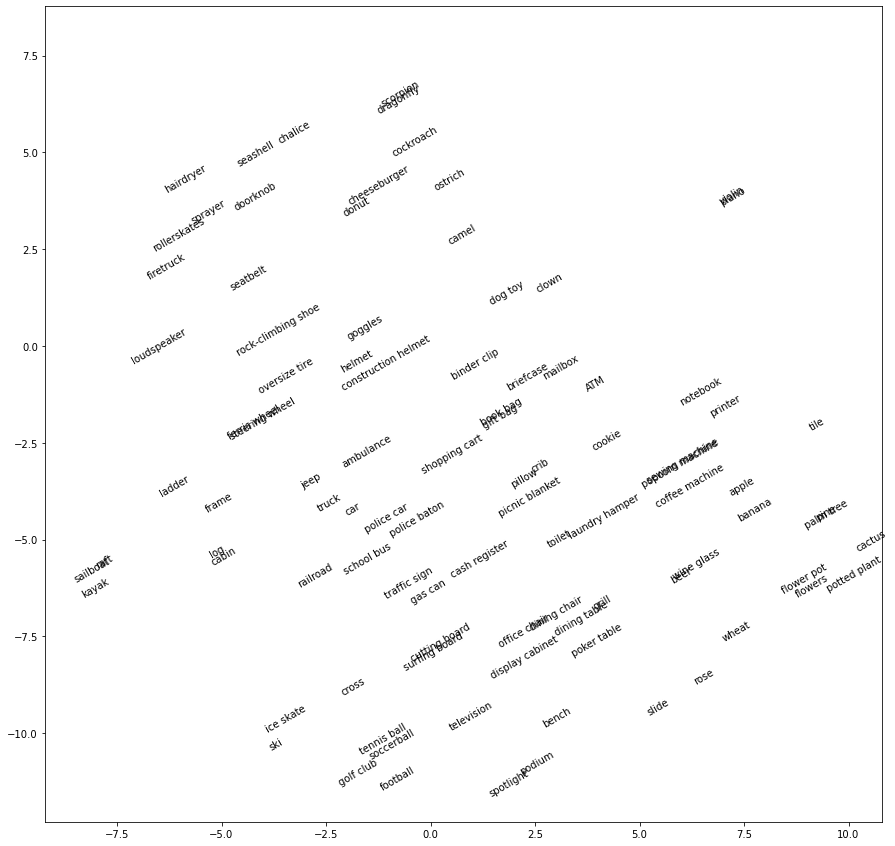

In [18]:
R = sio.loadmat('modelRDMs/GLOVE.mat')
R = R['R']
# thresholding option below
R = R * (R > np.mean(R))

opt = 1

if opt==1:
    feat_embed = TSNE(n_components=2,
                  metric = 'precomputed', #requires a distance matrix as input
                  learning_rate = 'auto').fit_transform(1-R)
elif opt==2:
    feat_embed = MDS(n_components=2,
                  dissimilarity= 'precomputed' #requires a distance matrix as input
                  ).fit_transform(1-R)
elif opt==3:
    feat_embed, _ = sklearn.manifold.smacof(dissimilarities=1-R)

    
from scipy.spatial import distance_matrix
embed_dist = distance_matrix(x = feat_embed, y = feat_embed)
#feat_embed.shape

embed_sim = np.zeros((114,))
for i in range(114):
    embed_sim[i]=np.corrcoef(embed_dist[:,i].flatten(),(1-R)[:,i].flatten())[0,1]

plt.figure(figsize=(15,15))
boxsize = 0.07 * (np.max(feat_embed[:,0])-np.min(feat_embed[:,0]))

plt.xlim(np.min(feat_embed[:,0])-0.5*boxsize, np.max(feat_embed[:,0])+0.5*boxsize)
plt.ylim(np.min(feat_embed[:,1])-0.5*boxsize, np.max(feat_embed[:,1])+0.5*boxsize)

object_name = tblStim['Object'].to_list()
for i in range(114):
    
    img = Image.open(imagePath + filelist[i])
    img = np.array(img)
    x,y,_ = img.shape
    threshold = 240

    if embed_sim[i] > np.mean(embed_sim) - np.std(embed_sim):
        plt.text(x = feat_embed[i,0], y = feat_embed[i,1], s = object_name[i], rotation = 30)